In [1]:
from scipy.io import loadmat
import numpy as np 
import sympy as sp
import matplotlib.pyplot as plt
from numpy.fft import fft
import pandas as pd

filepath = "Hot-wire\Measurement\Data\Points\it=Shear1_P=59,30.csv"
df = pd.read_csv(filepath)
V = df.iloc[:, 1].values

coefficients = np.loadtxt('polynomial_coefficients.txt')
u = np.polyval(coefficients, V)

n =  np.shape(u)[0]
nblock = 1

dt = df.iloc[1, 0] - df.iloc[0, 0]
fs = 1 / dt

plt.plot(u)
plt.title('Plot of U')
plt.xlabel('Index')
plt.ylabel('U')
plt.show()


<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Victor\AppData\Local\Temp\ipykernel_19216\1338523954.py:8: SyntaxWarning: invalid escape sequence '\M'
  filepath = "Hot-wire\Measurement\Data\Points\it=Shear1_P=59,30.csv"
C:\Users\Victor\AppData\Local\Temp\ipykernel_19216\1338523954.py:8: SyntaxWarning: invalid escape sequence '\M'
  filepath = "Hot-wire\Measurement\Data\Points\it=Shear1_P=59,30.csv"


ModuleNotFoundError: No module named 'pandas'

In [11]:
figure_size = (6,4)

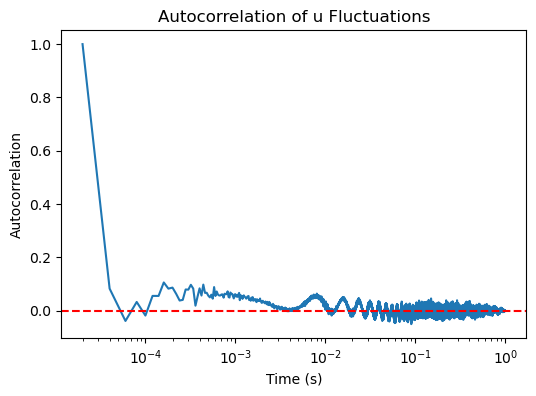

Integral under the plot: 1.0825913372774004e-05


In [20]:
uf = u - u.mean()
temp = np.correlate(uf, uf, mode='full') / n
all_autocorr = temp[n-1:] / temp.max()  

plt.figure(figsize=figure_size)  # Set the size of the graph
plt.semilogx( np.arange(n)*dt+dt,all_autocorr)
plt.axhline(y=0, color='r', linestyle='--')  # Add a line at y=0
plt.title('Autocorrelation of u Fluctuations')
plt.xlabel('Time (s)')
plt.ylabel('Autocorrelation')
plt.show()

integral = np.trapz(all_autocorr[:2], dx = dt)
print("Integral under the plot:", integral)